# 1 什么是激活函数

激活函数是深度学习，亦或者说人工神经网络中一个十分重要的组成部分，它可以对神经元的接收信息进行非线性变换，将变换后的信息输出到下一层神经元。激活函数作用方式如下公式所示：

$$y = Activation(\sum\limits_i^N {{w_i} \cdot {x_i} + b} )$$

其中，$Activation()$就是激活函数。

为什么要使用激活函数呢？当我们不用激活函数时，网络中各层只会根据权重$w$和偏差$b$只会进行线性变换，就算有多层网络，也只是相当于多个线性方程的组合，依然只是相当于一个线性回归模型，解决复杂问题的能力有限。我们希望我们的神经网络能够处理复杂任务，如语言翻译和图像分类等，线性变换永远无法执行这样的任务。激活函数得加入能对输入进行非线性变换，使其能够学习和执行更复杂的任务。

另外，激活函数使反向传播成为可能，因为激活函数的误差梯度可以用来调整权重和偏差。如果没有可微的非线性函数，这就不可能实现。

总之，激活函数的作用是能够给神经网络加入一些非线性因素，使得神经网络可以更好地解决较为复杂的问题。

# 2 常用激活函数
# 2.1 sigmoid函数

sigmoid函数可以将整个实数范围的的任意值映射到[0,1]范围内，当当输入值较大时,sigmoid将返回一个接近于1的值,而当输入值较小时,返回值将接近于0。sigmoid函数数学公式和函数图像如下所示：

$$f(x) = \frac{1}{{1 + {e^{ - x}}}}$$

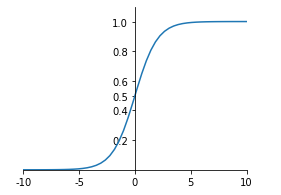

感受一下TensorFlow中的sigmoid函数：

In [1]:
import tensorflow as tf
x = tf.linspace(-5., 5.,6)
x

<tf.Tensor: id=3, shape=(6,), dtype=float32, numpy=array([-5., -3., -1.,  1.,  3.,  5.], dtype=float32)>

有两种方式可以调用sigmoid函数：

In [2]:
tf.keras.activations.sigmoid(x)

<tf.Tensor: id=4, shape=(6,), dtype=float32, numpy=
array([0.00669285, 0.04742587, 0.26894143, 0.7310586 , 0.95257413,
       0.9933072 ], dtype=float32)>

In [3]:
tf.sigmoid(x)

<tf.Tensor: id=5, shape=(6,), dtype=float32, numpy=
array([0.00669285, 0.04742587, 0.26894143, 0.7310586 , 0.95257413,
       0.9933072 ], dtype=float32)>

看，$x$中所有值都映射到了[0,1]范围内。

sigmoid优缺点总结：
- 优点：输出的映射区间(0,1)内单调连续，非常适合用作输出层，并且比较容易求导。

- 缺点：具有软饱和性，即当输入x趋向于无穷的时候，它的导数会趋于0，导致很容易产生梯度消失。

# 2.2 relu函数

Relu（Rectified Linear Units修正线性单元），是目前被使用最为频繁得激活函数，relu函数在x<0时，输出始终为0。由于x>0时，relu函数的导数为1，即保持输出为x，所以relu函数能够在x>0时保持梯度不断衰减，从而缓解梯度消失的问题，还能加快收敛速度，还能是神经网络具有稀疏性表达能力，这也是relu激活函数能够被使用在深层神经网络中的原因。由于当x<0时，relu函数的导数为0，导致对应的权重无法更新，这样的神经元被称为"神经元死亡"。

relu函数公式和图像如下：

$$f(x) = \max (0,x)$$

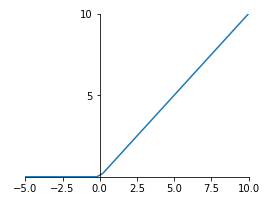

在TensorFlow中，relu函数的参数情况比sigmoid复杂，我们先来看一下：

tf.keras.activations.relu( x, alpha=0.0, max_value=None, threshold=0 )  
- x：输入的变量
- alpha：上图中左半边部分图像的斜率，也就是x值为负数（准确说应该是小于threshold）部分的斜率，默认为0
- max_value：最大值，当x大于max_value时，输出值为max_value
- threshold：起始点，也就是上面图中拐点处x轴的值

In [4]:
x = tf.linspace(-5., 5.,6)
x

<tf.Tensor: id=9, shape=(6,), dtype=float32, numpy=array([-5., -3., -1.,  1.,  3.,  5.], dtype=float32)>

In [5]:
tf.keras.activations.relu(x)

<tf.Tensor: id=10, shape=(6,), dtype=float32, numpy=array([0., 0., 0., 1., 3., 5.], dtype=float32)>

In [6]:
tf.keras.activations.relu(x,alpha=2.)

<tf.Tensor: id=11, shape=(6,), dtype=float32, numpy=array([-10.,  -6.,  -2.,   1.,   3.,   5.], dtype=float32)>

In [7]:
tf.keras.activations.relu(x,max_value=2.)  # 大于2部分都将输出为2.

<tf.Tensor: id=16, shape=(6,), dtype=float32, numpy=array([0., 0., 0., 1., 2., 2.], dtype=float32)>

In [8]:
tf.keras.activations.relu(x,alpha=2., threshold=3.5)  # 小于3.5的值按照alpha * (x - threshold)计算

<tf.Tensor: id=27, shape=(6,), dtype=float32, numpy=array([-17., -13.,  -9.,  -5.,  -1.,   5.], dtype=float32)>

# 2.3 softmax函数

softmax函数是sigmoid函数的进化，在处理分类问题是很方便，它可以将所有输出映射到成概率的形式，即值在[0,1]范围且总和为1。例如输出变量为[1.5,4.4,2.0]，经过softmax函数激活后，输出为[0.04802413, 0.87279755, 0.0791784 ],分别对应属于1、2、3类的概率。softmax函数数学公式如下：

$$f({x_i}) = \frac{{{e^{{x_i}}}}}{{\sum\limits_i {{e^{{x_i}}}} }}$$

In [9]:
tf.nn.softmax(tf.constant([[1.5,4.4,2.0]]))

<tf.Tensor: id=29, shape=(1, 3), dtype=float32, numpy=array([[0.04802413, 0.87279755, 0.0791784 ]], dtype=float32)>

In [10]:
tf.keras.activations.softmax(tf.constant([[1.5,4.4,2.0]]))

<tf.Tensor: id=31, shape=(1, 3), dtype=float32, numpy=array([[0.04802413, 0.87279755, 0.0791784 ]], dtype=float32)>

In [11]:
x = tf.random.uniform([1,5],minval=-2,maxval=2)
x

<tf.Tensor: id=38, shape=(1, 5), dtype=float32, numpy=
array([[ 1.9715171 ,  0.49954653, -0.37836075,  1.6178164 ,  0.80509186]],
      dtype=float32)>

In [12]:
tf.keras.activations.softmax(x)

<tf.Tensor: id=39, shape=(1, 5), dtype=float32, numpy=
array([[0.42763966, 0.09813169, 0.04078862, 0.30023944, 0.13320053]],
      dtype=float32)>

# 2.4 tanh函数

tanh函数无论是功能还是函数图像上斗鱼sigmoid函数十分相似，所以两者的优缺点也一样，区别在于tanh函数将值映射到[-1,1]范围，其数学公式和函数图像如下：

$$f(x) = \frac{{\sinh x}}{{\cosh x}} = \frac{{1 - {e^{ - 2x}}}}{{1 + {e^{ - 2x}}}}$$

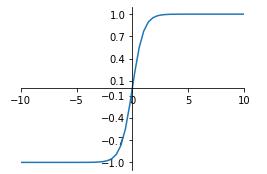

In [13]:
x = tf.linspace(-5., 5.,6)
x

<tf.Tensor: id=43, shape=(6,), dtype=float32, numpy=array([-5., -3., -1.,  1.,  3.,  5.], dtype=float32)>

In [14]:
tf.keras.activations.tanh(x)

<tf.Tensor: id=44, shape=(6,), dtype=float32, numpy=
array([-0.99990916, -0.9950547 , -0.7615942 ,  0.7615942 ,  0.9950547 ,
        0.99990916], dtype=float32)>

# 3 总结

神经网络中，隐藏层之间的输出大多需要通过激活函数来映射（当然，也可以不用，没有使用激活函数的层一般称为logits层），在构建模型是，需要根据实际数据情况选择激活函数。TensorFlow中的激活函数可不止这4个，本文只是介绍最常用的4个，当然，其他激活函数大多是这几个激活函数的变种。